In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mvc = pd.read_csv('nypd_mvc_2018.csv')
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


In [3]:
mvc.columns

Index(['unique_key', 'date', 'time', 'borough', 'location', 'on_street',
       'cross_street', 'off_street', 'pedestrians_injured', 'cyclist_injured',
       'motorist_injured', 'total_injured', 'pedestrians_killed',
       'cyclist_killed', 'motorist_killed', 'total_killed', 'vehicle_1',
       'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5', 'cause_vehicle_1',
       'cause_vehicle_2', 'cause_vehicle_3', 'cause_vehicle_4',
       'cause_vehicle_5'],
      dtype='object')

In [4]:
data = np.random.choice([1.0, np.nan], size = (3,3), p = [.3, .7])
data

array([[nan, nan,  1.],
       [nan, nan,  1.],
       [nan, nan, nan]])

In [5]:
df = pd.DataFrame(data, columns = ['A', 'B', 'C'])
df

,A,B,C
0,NaN,NaN,1.0
1,NaN,NaN,1.0
2,NaN,NaN,NaN


In [6]:
df.isnull().sum(axis = 1)

0    2
1    2
2    3
dtype: int64

In [7]:
df.sum(axis = 0)

A    0.0
B    0.0
C    2.0
dtype: float64

In [8]:
null_counts = mvc.isnull().sum()
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

In [9]:
null_counts_pct = null_counts / mvc.shape[0] * 100
null_counts_pct

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64

In [10]:
null_df = pd.DataFrame({'null_counts':null_counts, 'null_pct':null_counts_pct})
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)
null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,0,35,6,24,50,76,0,0,...,0,21,93,98,99,0,15,93,98,99


In [11]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


### imputation
* The techanical name for filling in a missing value with a replacement value

In [12]:
killed = mvc[killed_cols].copy()
killed.head()

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0


In [13]:
killed_manual_sum = killed.iloc[:, 0:3].sum(axis = 1)
killed_mask = killed_manual_sum != killed.total_killed
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


In [15]:
killed[killed.iloc[:, 0:3].sum(axis =1) != killed.total_killed]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


* Series.mask()
* Useful when you want to replace certain values in a series based off a boolean mask
* Series.mask(bool_mask, val_to_replace)

In [16]:
fruites = pd.Series(['Apple', 'Banana', 'Banana'])
bool = fruites == 'Banana'
result = fruites.mask(bool, 'Pear')
result

0    Apple
1     Pear
2     Pear
dtype: object

In [17]:
nums = pd.Series(['one', 'two', 'three'])
result = fruites.mask(bool, nums)
result

0    Apple
1      two
2    three
dtype: object

In [19]:
killed_null = killed['total_killed'].isnull()
killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0
...,...,...,...,...
57859,0,0,0,0.0
57860,0,0,0,0.0
57861,0,0,0,0.0
57862,0,0,0,0.0


In [24]:
killed.total_killed = killed.total_killed.mask(killed.total_killed != killed_manual_sum, np.nan)
killed[killed_mask]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,0.0
20163,0,0,0,0.0
22046,0,0,1,NaN
48719,0,0,0,0.0
55148,0,0,0,0.0
55699,0,0,0,0.0


In [25]:
# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured.head()

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0
3,0,0,0,0.0
4,0,0,0,0.0


In [26]:
injured_manual_sum = injured.iloc[:, 0:3].sum(axis = 1)
injured_manual_sum.isnull().sum()

0

In [33]:
injured.total_injured = injured.total_injured.mask(injured.total_injured.isnull(), injured_manual_sum)
injured.total_injured.isnull().sum()

0

In [34]:
injured.total_injured = injured.total_injured.mask(injured_manual_sum != injured.total_injured, np.nan)

In [35]:
injured.total_injured[injured.total_injured.isnull()]

1222    NaN
3263    NaN
3362    NaN
3508    NaN
10989   NaN
12885   NaN
13344   NaN
15213   NaN
20163   NaN
20978   NaN
23276   NaN
24907   NaN
28330   NaN
31299   NaN
37520   NaN
42089   NaN
42179   NaN
48596   NaN
51518   NaN
55930   NaN
56100   NaN
Name: total_injured, dtype: float64

In [37]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
pd.DataFrame(summary, index = ['before', 'after'])

,injured,killed
before,1,5
after,21,1


In [38]:
mvc['total_injured'] = injured.total_injured
mvc.total_killed = killed.total_killed

* Use seaborn.heatmap() to represent null values as light squares and non-null values as dark squares

In [52]:
def plot_null_matrix(df, figsize = (18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dtaframe
    sns.heatmap(df_null, cbar = False, yticklabels=False)
    plt.xticks(rotation = 90, size = 'x-large')
    plt.show()

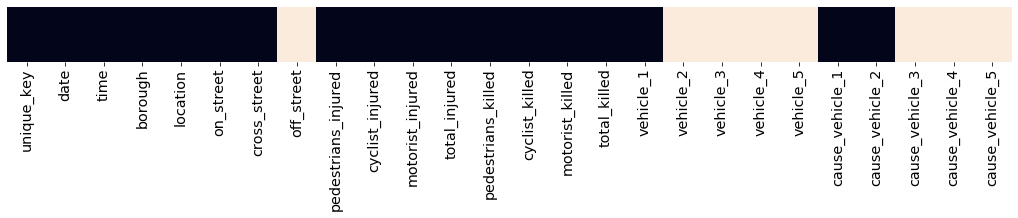

In [53]:
plot_null_matrix(mvc.head(1), figsize=(18,1))

In [49]:
mvc.head(1)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN


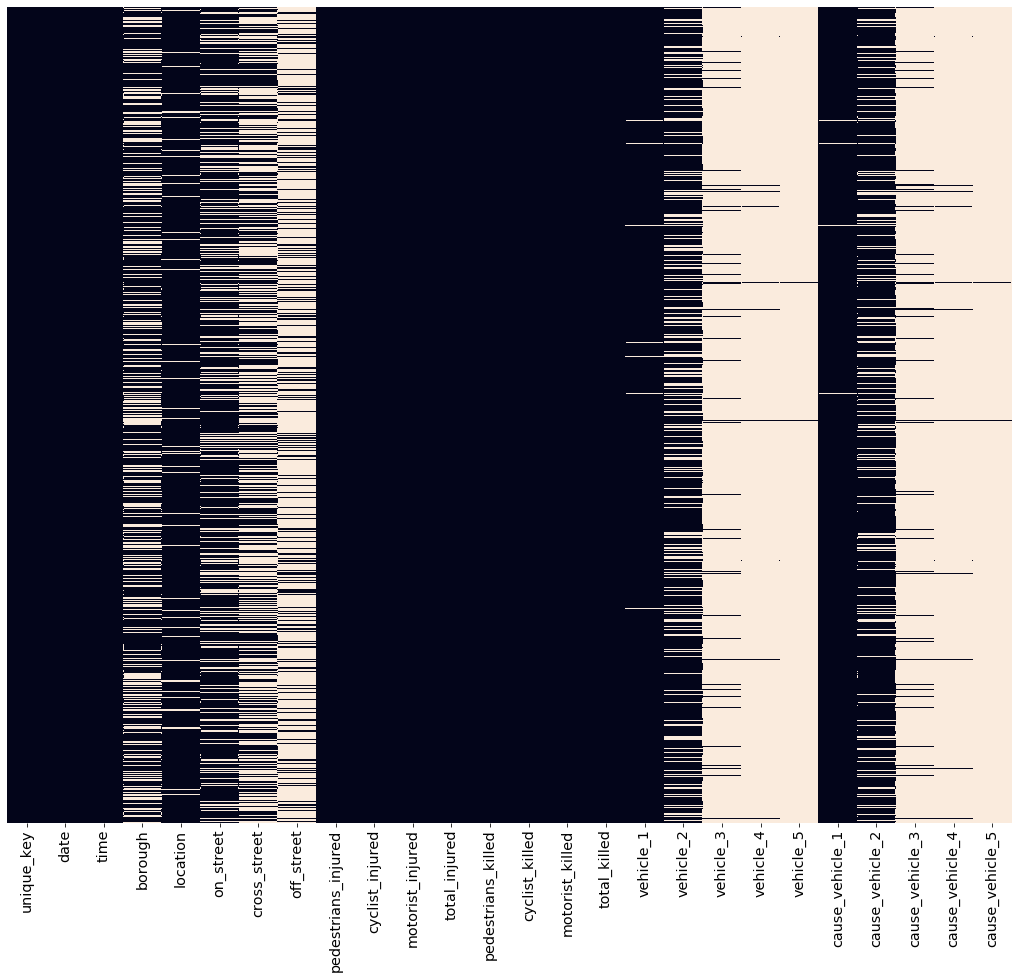

In [54]:
plot_null_matrix(mvc)

#### * correlation
* dataframe.corr()

In [55]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
missing_corr

,borough,location,on_street,cross_street,off_street,total_injured,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
borough,1.000000,0.190105,-0.350190,0.409107,0.362189,-0.002827,0.005582,-0.018325,-0.077516,-0.061932,-0.020406,-0.010733,-0.012115,-0.058596,-0.060542,-0.020158,-0.011348
location,0.190105,1.000000,-0.073975,-0.069719,0.084579,-0.001486,0.015496,-0.010466,-0.033842,-0.000927,0.004655,-0.005797,-0.003458,-0.021373,0.000684,0.004604,-0.004841
on_street,-0.350190,-0.073975,1.000000,0.557767,-0.991030,0.006220,-0.002344,-0.001889,0.119647,0.020867,0.004172,-0.002768,0.001307,0.087374,0.017426,0.002737,-0.003107
cross_street,0.409107,-0.069719,0.557767,1.000000,-0.552763,0.002513,0.004112,-0.017018,0.043799,-0.049910,-0.021137,-0.012003,-0.009102,0.031189,-0.052159,-0.022074,-0.013455
off_street,0.362189,0.084579,-0.991030,-0.552763,1.000000,-0.004266,0.002323,0.001812,-0.121129,-0.022404,-0.004074,0.002492,-0.001738,-0.088187,-0.019120,-0.002580,0.002863
total_injured,-0.002827,-0.001486,0.006220,0.002513,-0.004266,1.000000,-0.000079,0.079840,0.025644,-0.002757,0.002118,0.001073,0.131140,0.030082,-0.002388,0.002188,0.001102
total_killed,0.005582,0.015496,-0.002344,0.004112,0.002323,-0.000079,1.000000,-0.000327,0.008017,0.001057,0.000462,0.000234,-0.000229,0.009888,0.001091,0.000477,0.000240
vehicle_1,-0.018325,-0.010466,-0.001889,-0.017018,0.001812,0.079840,-0.000327,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022,0.004545
vehicle_2,-0.077516,-0.033842,0.119647,0.043799,-0.121129,0.025644,0.008017,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050,0.029264
vehicle_3,-0.061932,-0.000927,0.020867,-0.049910,-0.022404,-0.002757,0.001057,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525,0.225067


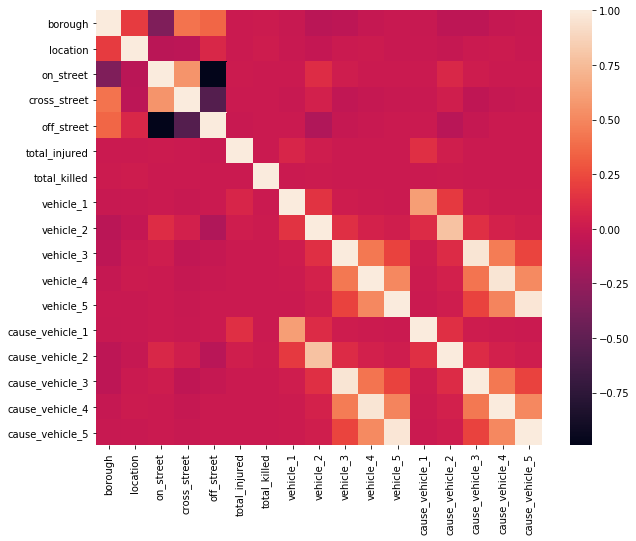

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(missing_corr)

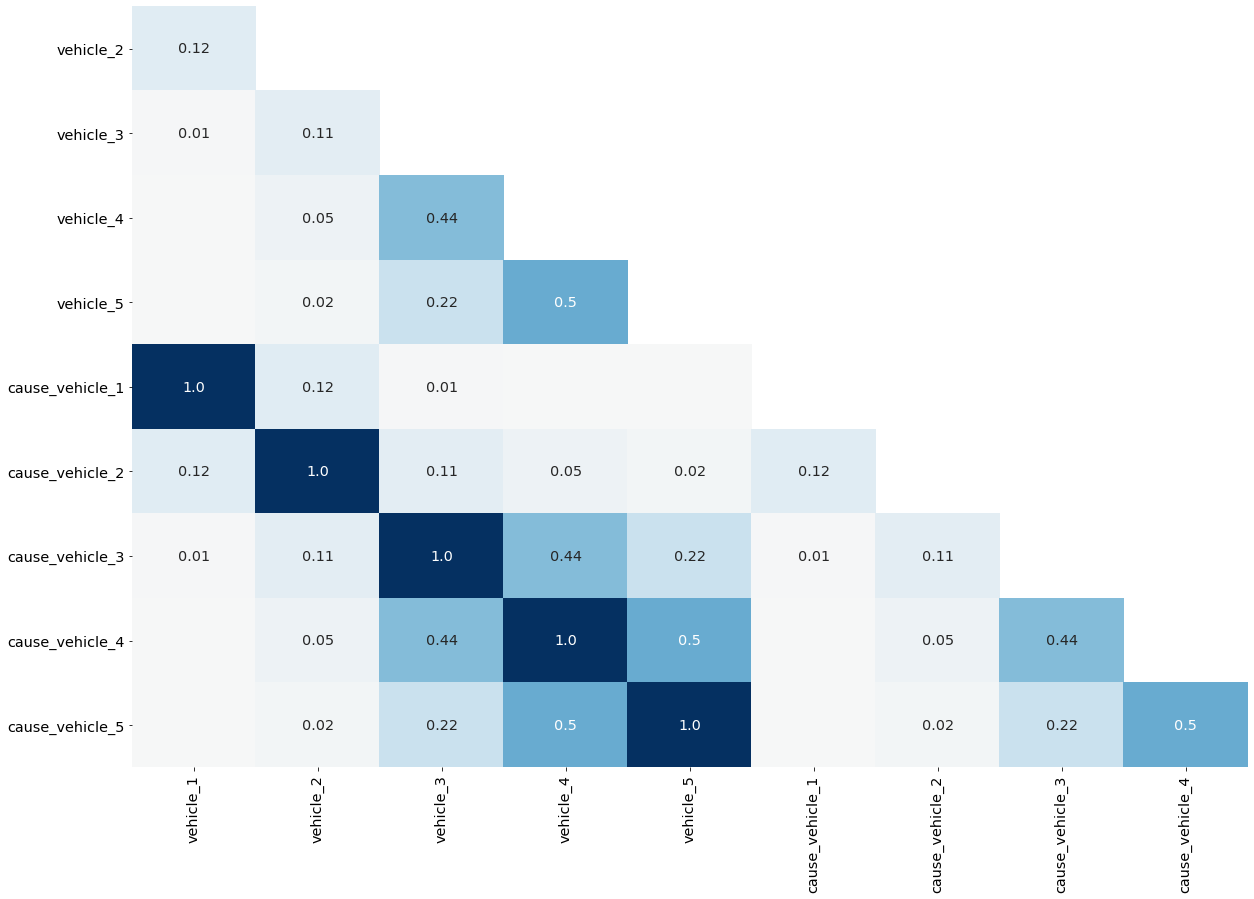

In [111]:
def plot_null_correlations(df):
    missing_corr = df[df.columns[df.isnull().sum() > 0]].isnull().corr()
    
    #creating a trianglar mask to avoid repeated values and make the plot easier tp read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k = 1)
    
    #plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin = -1, vmax = 1, cbar = False, cmap = 'RdBu', mask = mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation = 90, size = 'x-large')
    plt.yticks(rotation = 0, size = 'x-large')
    
vehicle_cols = [col for col in mvc.columns if 'vehicle' in col]
plot_null_correlations(mvc[vehicle_cols])
    

In [81]:
np.triu(np.ones_like(missing_corr.iloc[1:, :-1]), k = 1)

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

* Explore the variations in missing values from those five pairs of columns, create a frame that
* The number of values where the vehicles is missing when the causes is not missing
* The number of values where the cause is missing when the vehicle is not missing

In [91]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']
vc_null_data = []
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = mvc[(mvc[v_col].isnull()) & (mvc[c_col].notnull())].shape[0]
    c_null = mvc[(mvc[c_col].isnull()) & (mvc[v_col].notnull())].shape[0]
    vc_null_data.append([v, v_null, c_null])
vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [83]:
mvc.columns

Index(['unique_key', 'date', 'time', 'borough', 'location', 'on_street',
       'cross_street', 'off_street', 'pedestrians_injured', 'cyclist_injured',
       'motorist_injured', 'total_injured', 'pedestrians_killed',
       'cyclist_killed', 'motorist_killed', 'total_killed', 'vehicle_1',
       'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5', 'cause_vehicle_1',
       'cause_vehicle_2', 'cause_vehicle_3', 'cause_vehicle_4',
       'cause_vehicle_5'],
      dtype='object')

* Find the most common values across multile columns
* Need to convert dataframe of multiple columns into one single column
* DataFrame.stack()

In [93]:
test = pd.DataFrame([['one', 'two', 'three'], ['two', 'four', 'six'], ['three', 'six', 'nine']], 
                    columns=['A','B','C'])
test

,A,B,C
0,one,two,three
1,two,four,six
2,three,six,nine


In [95]:
test.stack().value_counts()

three    2
two      2
six      2
nine     1
one      1
four     1
dtype: int64

In [96]:
cause_cols = [c for c in mvc.columns if "cause_" in c]
cause = mvc[cause_cols]
cause.head()

,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,Following Too Closely,Unspecified,NaN,NaN,NaN
1,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,Following Too Closely,Unspecified,NaN,NaN,NaN
3,Glare,Passing Too Closely,NaN,NaN,NaN
4,Turning Improperly,Unspecified,NaN,NaN,NaN


In [98]:
cause_1d = cause.stack()
cause_1d.head()
# stacked version omits null values

0  cause_vehicle_1    Following Too Closely
   cause_vehicle_2              Unspecified
1  cause_vehicle_1         Backing Unsafely
   cause_vehicle_2              Unspecified
2  cause_vehicle_1    Following Too Closely
dtype: object

In [99]:
cause_counts = cause_1d.value_counts()
top10_causes = cause_counts.head(10)
top10_causes

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64

In [101]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
vehicles = mvc[v_cols]
top10_vehicles = vehicles.stack().value_counts().head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

* 1. For values where the vehicle is null and the cause is non-null, set the vehicle to Unspecified
* 2. For values where the cause is null and vehicle is non-null, set the cause to Unspecified

In [102]:
# create a mask for each column
v_missing_mask = mvc.vehicle_1.isnull() & mvc.cause_vehicle_1.notnull()
c_missing_mask = mvc.cause_vehicle_1.isnull() & mvc.vehicle_1.notnull()

# replace the values matching the mask for each column
mvc.vehicle_1 = mvc.vehicle_1.mask(v_missing_mask, 'Unspecified')
mvc.cause_vehicle_1 = mvc.cause_vehicle_1.mask(c_missing_mask, 'Unspecified')

In [105]:
def summarize_missing():
    v_missing_data= []
    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)
        
        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
        
        v_missing_data.append([v, v_missing, c_missing])
    col_labels = columns = ['vehicle_number', 'vehicle_missing', 'cause_missing']
    return pd.DataFrame(v_missing_data, columns = col_labels)

In [106]:
summarize_missing()

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [107]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
    mvc[v_col] = mvc[v_col].mask(v_missing_mask, "Unspecified")
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, "Unspecified")
summary_after = summarize_missing()

In [108]:
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


In [114]:
del plot_null_correlation

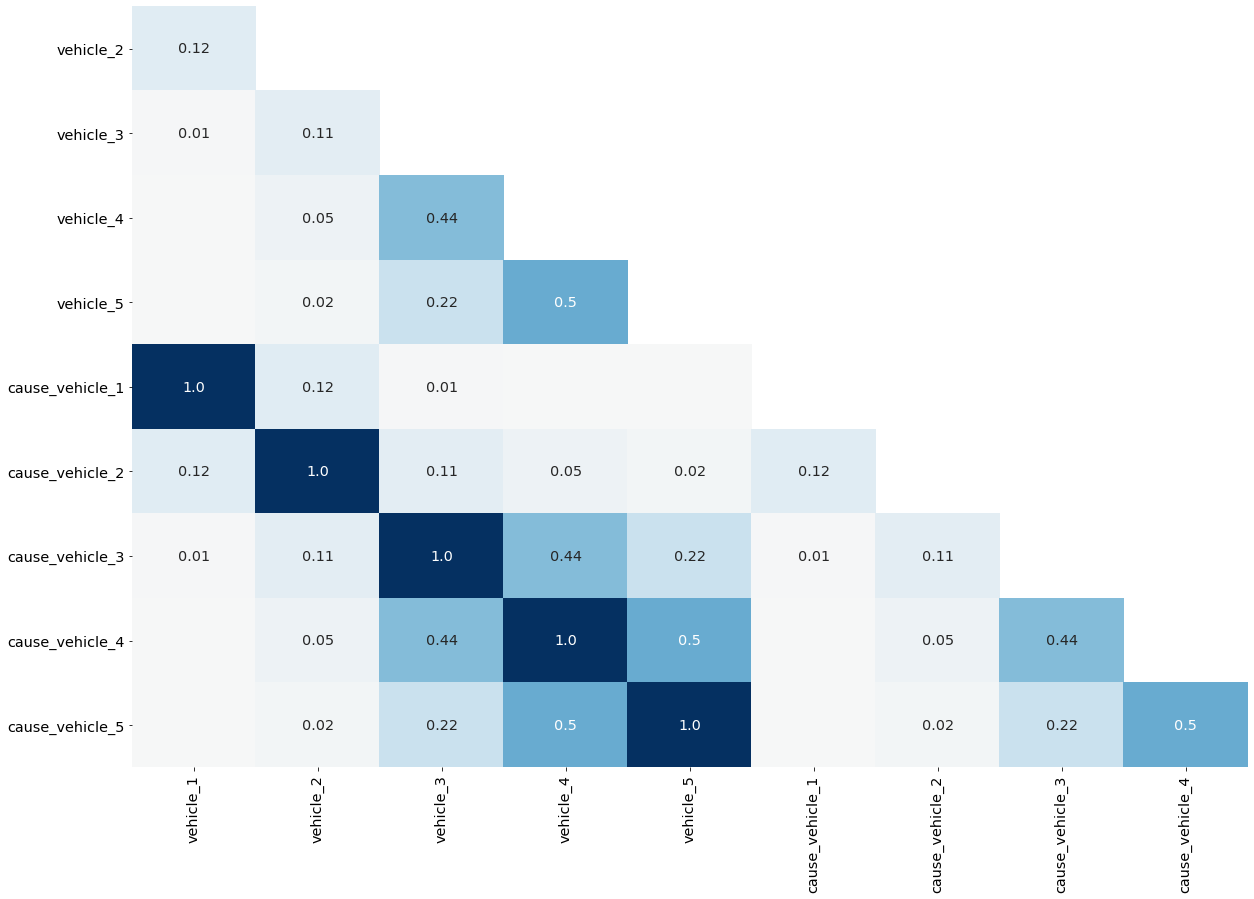

In [115]:
plot_null_correlations(mvc[vehicle_cols])

*  perfect correlation between each pair of vehicle/cause columns represented by in each square, which means that there is a perfect relationship between the five pairs of vehicle/cause columns.

### Missing values - the columns that relate to the location of the accident

In [116]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN
...,...,...,...,...,...
57859,BRONX,"(40.85477, -73.90299)",CRESTON AVENUE,NaN,EAST 181 STREET
57860,QUEENS,"(40.78419, -73.84582)",COLLEGE POINT BOULEVARD,NaN,15 AVENUE
57861,NaN,"(40.711926, -74.0061)",PARK ROW,NaN,NaN
57862,NaN,"(40.71976, -73.94476)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN


In [117]:
location_data.isnull().sum()

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64

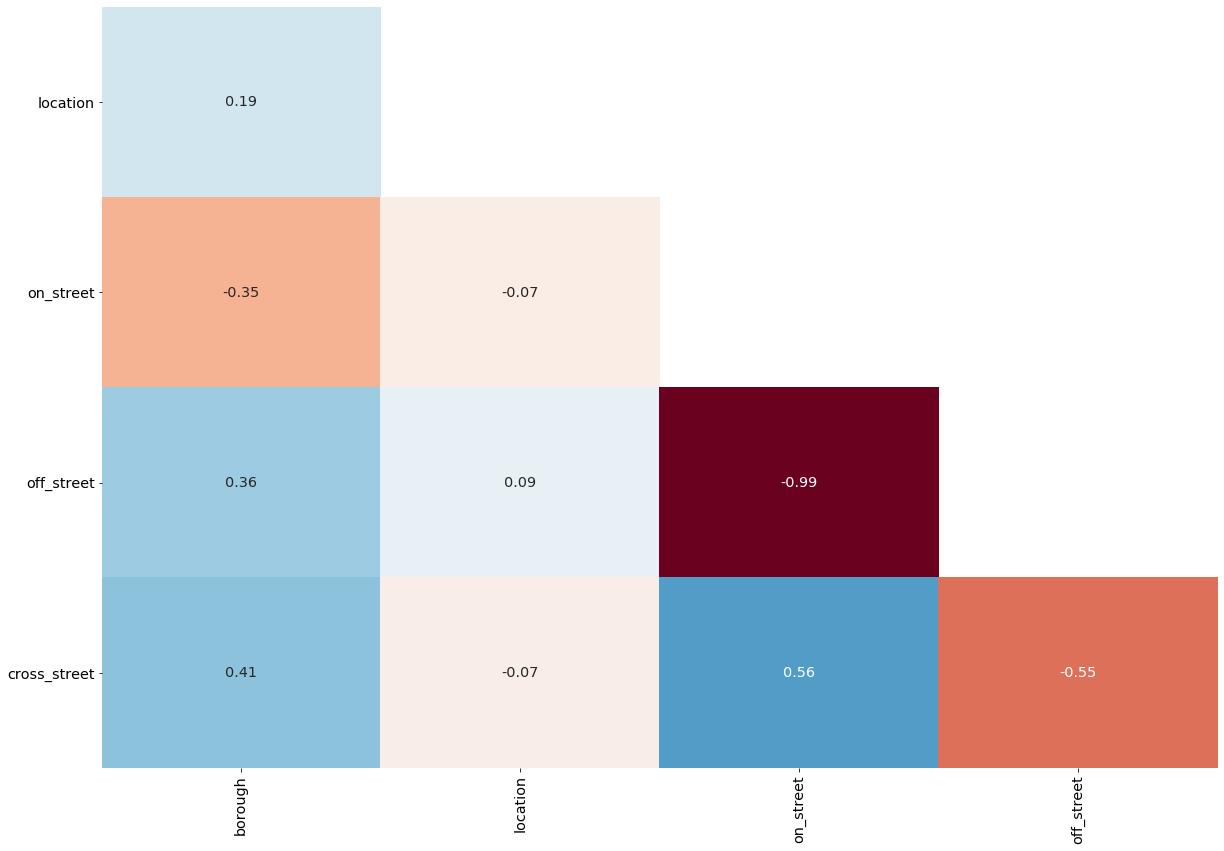

In [118]:
plot_null_correlations(location_data)

* Seems only off-street and on-street have strong correlations
* Means for almost every row that has a null value in one column, the other has a non-null value and vice-versa

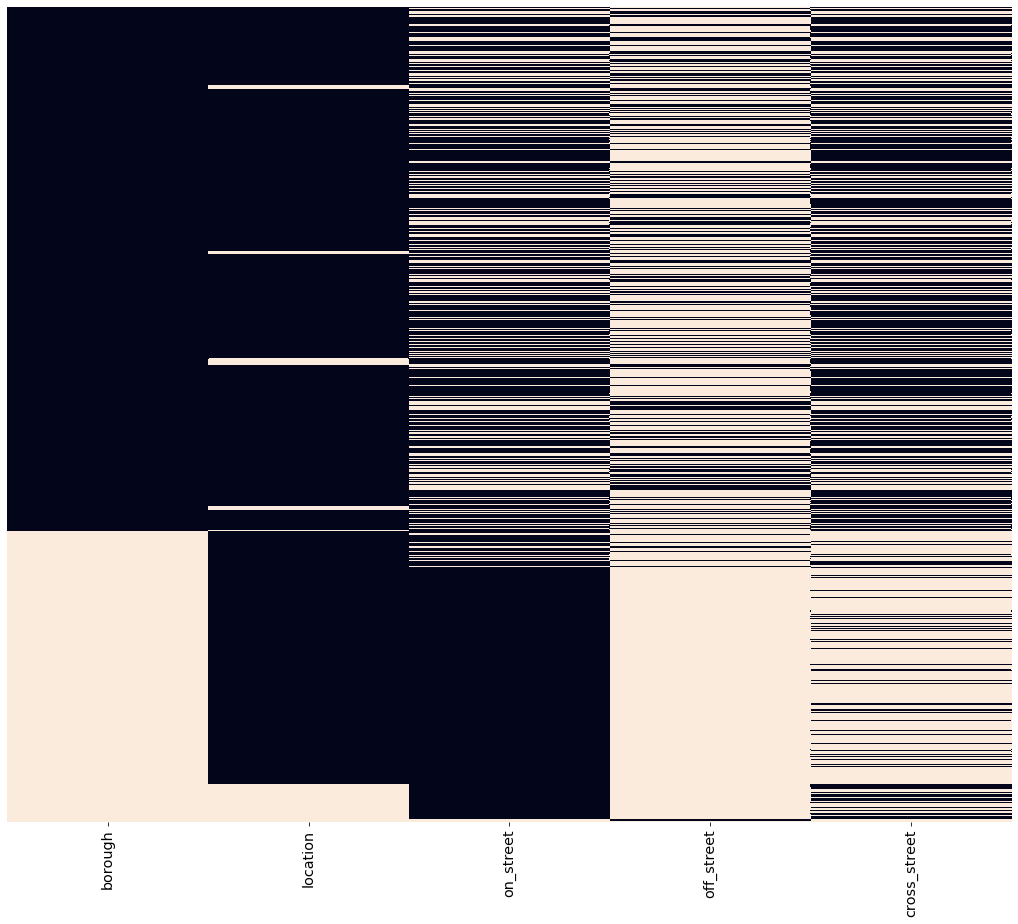

In [121]:
sorted_location_data= location_data.sort_values(loc_cols) # How to sort?????????????????????
plot_null_matrix(sorted_location_data)

* 1. About 2/3 of rows have non-null values for borough, but of those values that are missing, most have non-null values for location and one or more of the street name columns
* 2. Less than ont-tenth of rows have missing values in the location column, but most of these have non-null values in one or more of the street name columns
3. Most rows have a non-null value for either on_street or off_street, and some also have a value for cross_street

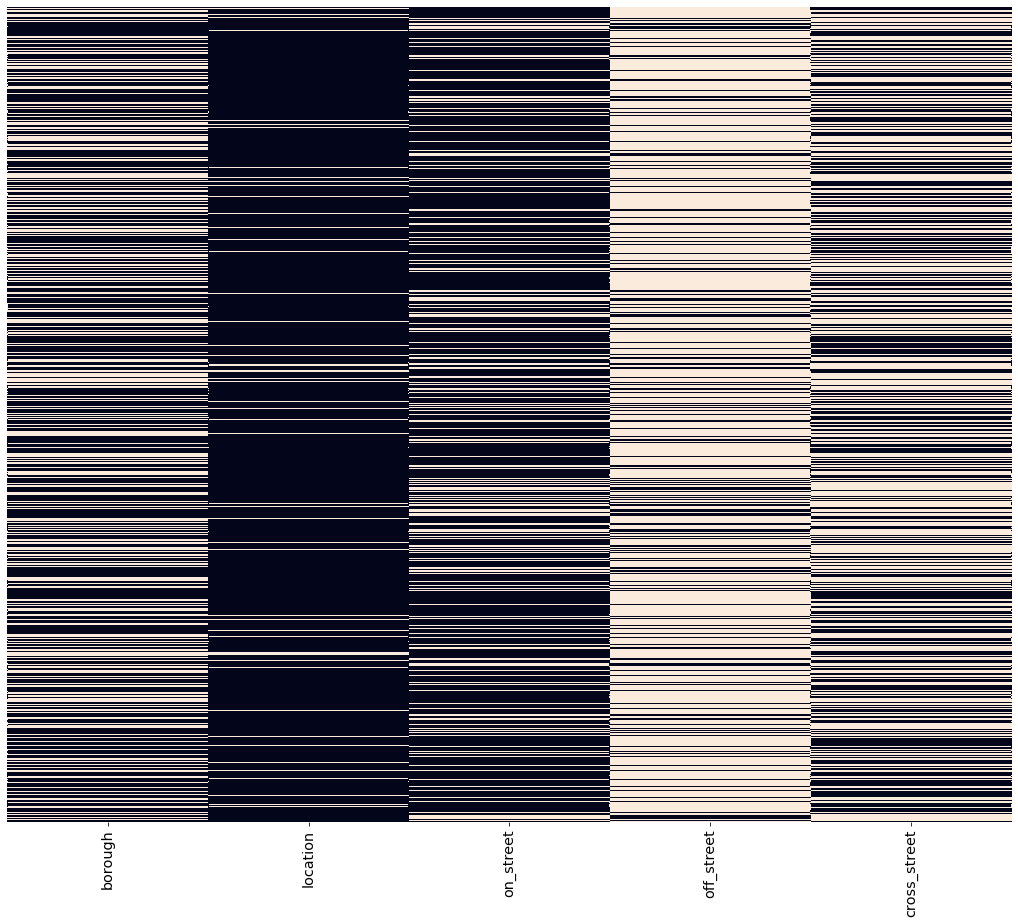

In [122]:
plot_null_matrix(location_data)

* The supplemental data is prepared using the GeoPy package, which makes working with Geocoding APIs like the Google Maps API easier.
* For rows with location values but missing values in either borough or the street name columns, we used geocoding APIs to look up the location coordinates to find the missing data.
* For rows with values in the street name columns missing borough and/or location data, we used geocoding APIs to look up the address to find the missing data.

In [123]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


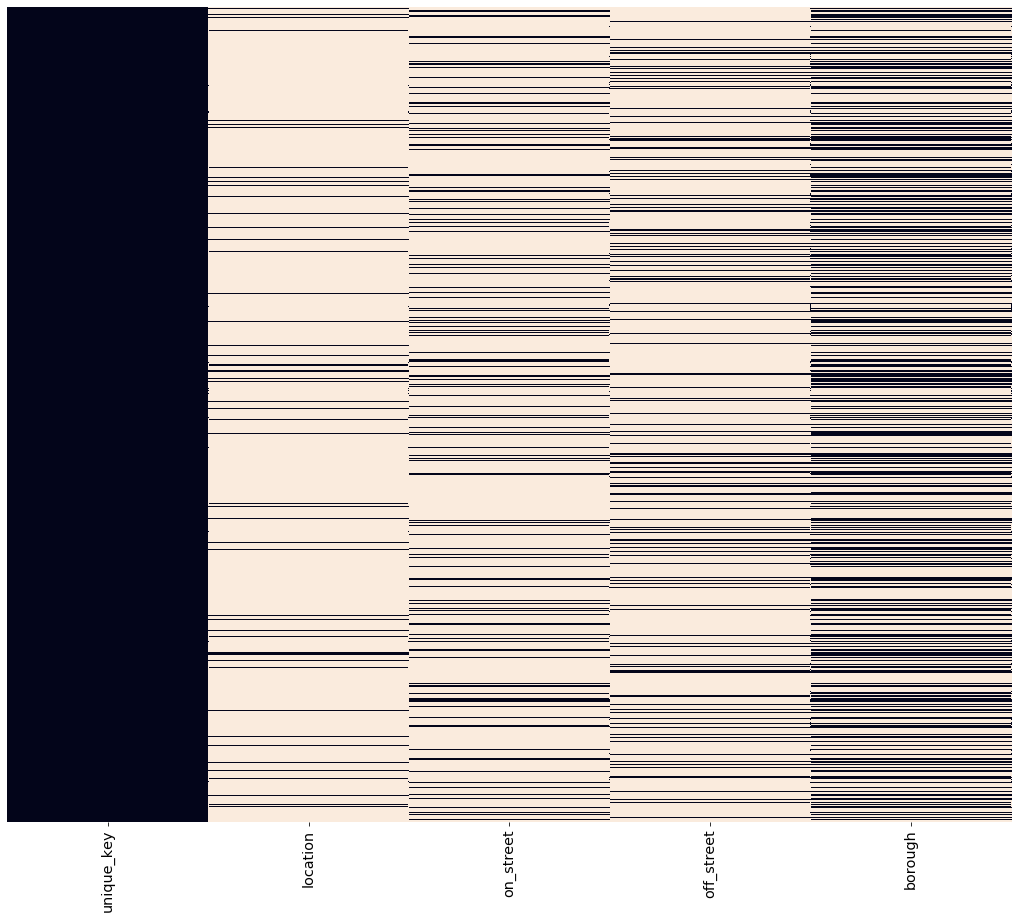

In [124]:
plot_null_matrix(sup_data)

* If the unique_key column in both the original and supplemental data has the same values in the same order, we'll be able to use Series.mask() to add our supplemental data to the original data.
* Series.equals()

In [125]:
mvc_keys = mvc['unique_key']
mvc.unique_key.equals(sup_data.unique_key)

True

In [127]:
location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()

In [128]:
for loc in location_cols:
    mvc[loc] = mvc[loc].mask(mvc[loc].isnull(), sup_data[loc])
null_after = mvc[location_cols].isnull().sum()

In [129]:
null_before

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [130]:
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64

In [131]:
mvc.isnull().sum()

unique_key                 0
date                       0
time                       0
borough                  232
location                  77
on_street              13734
cross_street           29249
off_street             36131
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured             21
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               1
vehicle_1                151
vehicle_2               8469
vehicle_3              54110
vehicle_4              57108
vehicle_5              57671
cause_vehicle_1          151
cause_vehicle_2         8469
cause_vehicle_3        54110
cause_vehicle_4        57108
cause_vehicle_5        57671
dtype: int64

If you'd like to continue working with this data, you can:

   - Drop the rows that had suspect values for injured and killed totals.
   - Clean the values in the vehicle_1 through vehicle_5 columns by analyzing the different values and merging duplicates and near-duplicates.
   - Analyze whether collisions are more likely in certain locations, at certain times, or for certain vehicle types.


In [132]:
mvc.location.unique()

array(['(40.742832, -74.00771)', '(40.623714, -73.99314)',
       '(40.591755, -73.9083)', ..., '(40.85477, -73.90299)',
       '(40.711926, -74.0061)', '(40.69181, -73.988235)'], dtype=object)

In [133]:
mvc.time.unique()

array(['21:40', '14:45', '0:00', ..., '0:54', '6:19', '4:27'],
      dtype=object)

In [136]:
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,Unspecified,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,BROOKLYN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


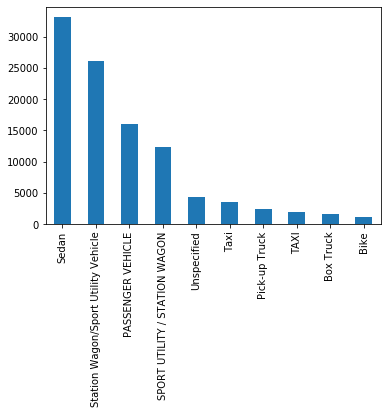

In [141]:
mvc[[c for c in mvc.columns if c.startswith('vehicle')]].stack().value_counts()[:10].plot(kind = 'bar')